# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [194]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import numpy as np 
import os
from scipy.stats import sem
from scipy.stats import linregress

# For plotting we add addtional dependencies
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import seaborn as sns

In [195]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print (mouse_metadata.head())
print (study_results.head())

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [196]:

# Combine the data into a single dataset

# Merge inner
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")      # Inner merge - using the intersection of keys from both frames

file_one = os.path.join('.','Output', 'Mouse_df.csv')
mouse_df.to_csv(file_one, index=False, header=True)                    # Writes out Mouse_df.cvs into the subdirectory "Output" 

# Display the data table for preview
mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [197]:
# Checking the number of mice.
numOfMice = len(mouse_df['Mouse ID'].unique())
numOfMice

249

In [198]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a data frame containing all the dublicate records
# Optional: Get all the data for the duplicate mouse ID. 

# this is a data frame that contains the duplicate records
Dup_Mice_Rec = mouse_df[mouse_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]  
Dup_Mice_Rec.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [199]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# All the duplicate records were for Mouse ID # g989

mouse_df = mouse_df.loc[mouse_df['Mouse ID']!= 'g989']    # creating a data frame that using all the mouse ID's except ID # g989
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [200]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_df['Mouse ID'].unique()))               # The data frame now contains one less unique mouse ID

248


## Summary Statistics

In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mouse_mean = mouse_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']        # mean 
mouse_median = mouse_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']    # median
mouse_var = mouse_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']          # variance 
mouse_std = mouse_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']          # standard deviation
mouse_sem = mouse_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']          # SEM 

# Assemble the resulting series into a single summary DataFrame.
mouse_tumor_stats_df = pd.DataFrame({
            'Tumor_mean': mouse_mean,
            'Tumor_median' : mouse_median,            
            'Tumor_var' : mouse_var,
            'Tumor_var' : mouse_std,
            'Tumor_sem' : mouse_sem})
mouse_tumor_stats_df.head(20)


,Tumor_mean,Tumor_median,Tumor_var,Tumor_sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [202]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_tumor_stats_df = mouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
mouse_tumor_stats_df.head(20)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

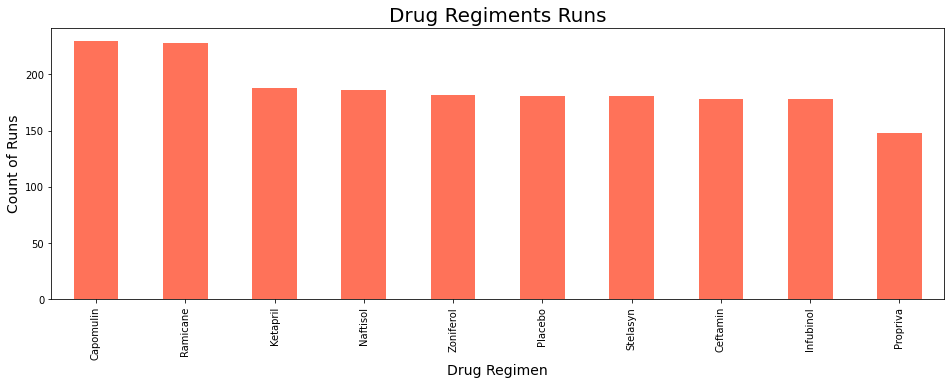

In [203]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
a = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count()         # create groupby that selects Drug Regimen and counts the number of observations that were recorded (timepoints)
a =a.sort_values(ascending=False)                                   # sort this descending (largest first)
plt.title("Drug Regiments Runs", fontsize = 20)                     # Add a title      
plt.ylabel("Count of Runs" , fontsize = 14)                         # Add a y-axis description
plt.xlabel("Drug Treatments", fontsize = 14)                        # Add an x-axis description
a.plot(kind='bar',                                                  # make a bar chart
            color='tomato',                                         # set color to tomato
            figsize=(16,5),                                         # set the figure size
            alpha=0.9,                                              # set the level of transpanancey
            align="center");                                        # center column lables with the bars
plt.show()

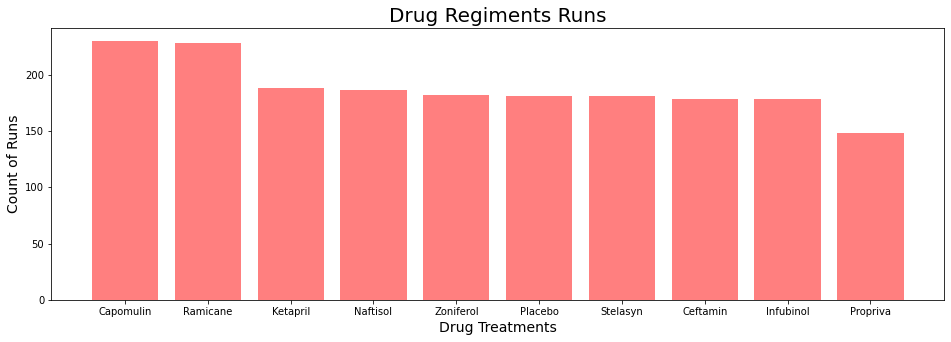

In [204]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#x_axis = mouse_df['Drug Regimen'].unique()
#y_axis = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values().tolist()
a = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False)
y_axis = a.tolist()                                                 # create a list of y_values
x_axis = a.index.tolist()                                           # create a list of x_values
plt.figure(figsize=(16,5))                                          # set the size of the figure
plt.title("Drug Regiments Runs", fontsize = 20)                     # Add a title      
plt.ylabel("Count of Runs" , fontsize = 14)                         # Add a y-axis description
plt.xlabel("Drug Treatments", fontsize = 14)                        # Add an x-axis description
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center");      # create the bar chart
plt.show()                                                          # show the bar chart

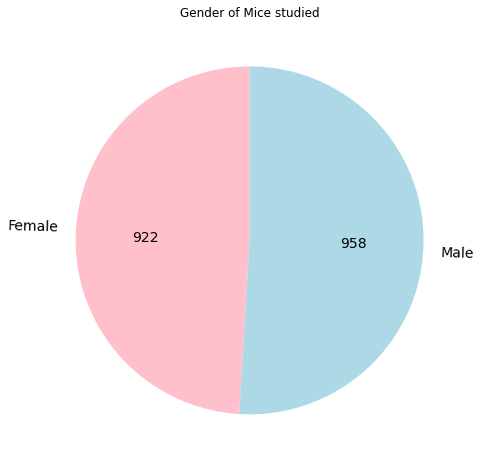

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_df.groupby(['Sex'])['Mouse ID'].count().plot(kind='pie', 
                                                figsize=(8,8),                                      #Set the figure size using the (x, y) tuple
                                                colors = ['pink','lightblue'],                      # Set the colors to pink and light blue
                                                title="Gender of Mice studied",                     # Add the title
                                                autopct=lambda x: '{:.0f}'.format(x*a.sum()/100),   # convert the % value back to a count value - The pie show the percent visually
                                                startangle=90,                                      # change the starting angle to straight up
                                                label='',                                           # Supress the vertical name title 'Mouse ID' on the left side
                                                rotatelabels = True,                                # slice label will be at the angel of the slice
                                                textprops={'fontsize': 14},                         # set the font size labels and ledgen                                                
                                                shadow = False);                                    # Don't have a shadow


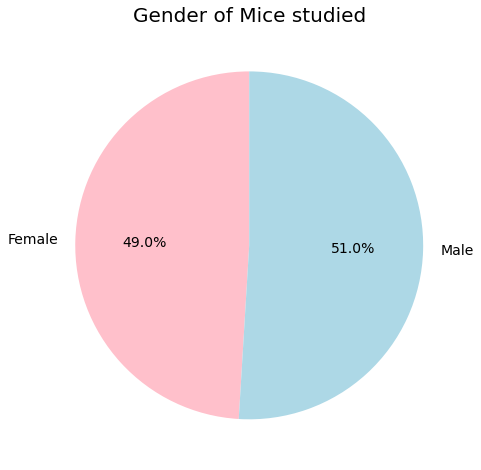

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
a = mouse_df.groupby(['Sex'])['Mouse ID'].count()
labels = a.index.tolist()                                       # Set the pie slice labels in a list
values = a.tolist()                                             # Set size of the slices in a list
colors = ['pink','lightblue']                                   # Set the colors for the slices in a list
fig = plt.figure(figsize=(8,8))                                 # Set the size of the chart
plt.title('Gender of Mice studied', fontsize = 20)              # Set the Title and its font size
plt.pie(values,                                                 # set the values for the chart
    labels=labels,                                              # set the labels for the chart
    colors=colors,                                              # set the colors for the chart using the previously defined variable.
    autopct="%1.1f%%",                                          # include the slice size as a % of the whole formated to 1 decimal point
    shadow=False,                                               # don't show a shadow
    frame = False,                                              # don't show a frame
    textprops={'fontsize': 14},                                 # make the labels and percentage 14  point text
    startangle=90);                                             # set the start angle to 90 degrees or straight up.


## Quartiles, Outliers and Boxplots

In [207]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df_45 = mouse_df.loc[(mouse_df['Timepoint'] == 45)]

# Build a data frame only containing Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_df_45_by4 = mouse_df_45.loc[(mouse_df_45['Drug Regimen'] == 'Capomulin') |
                 (mouse_df_45['Drug Regimen'] == 'Ramicane') |
                 (mouse_df_45['Drug Regimen'] == 'Infubinol') |
                 (mouse_df_45['Drug Regimen'] == 'Ceftamin')]

mouse_df_45_by4.head(10)
#c=mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') & (mouse_df['Timepoint']==45)]
#Capomulin = c['Tumor Volume (mm3)']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
224,c139,45,72.226731,2,Infubinol,Male,11,28
243,y163,45,67.685569,3,Infubinol,Female,17,27
253,k483,45,66.196912,3,Infubinol,Female,20,30
279,z581,45,62.754451,3,Infubinol,Female,24,25
289,a251,45,65.525743,1,Infubinol,Female,21,25
460,j913,45,31.560470,1,Ramicane,Female,4,17
470,a411,45,38.407618,1,Ramicane,Male,3,22
480,a444,45,43.047543,0,Ramicane,Female,10,25
490,d251,45,37.311236,2,Ramicane,Female,8,19


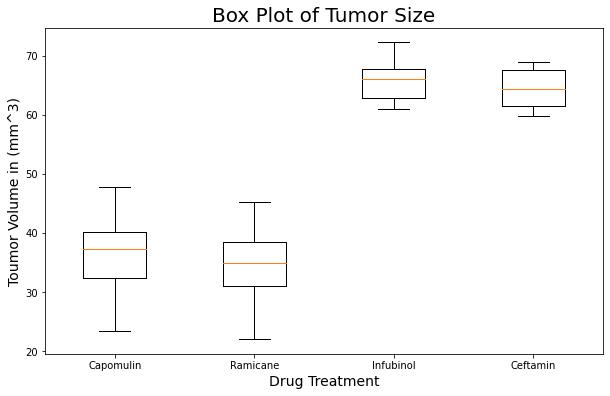

In [208]:

# Build list for each of the selected Drug Regimen including only the final observation, time point 45
Capomulin_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Ramicane_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ramicane') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Infubinol_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Infubinol') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Ceftamin_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ceftamin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()

# Put this list in to a dictionary
myDic= {'Capomulin':Capomulin_lst, 'Ramicane':Ramicane_lst, 'Infubinol':Infubinol_lst, 'Ceftamin':Ceftamin_lst}

# Create a Boxplot to see what is going on.
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Box Plot of Tumor Size', fontsize = 20)
plt.xlabel('Drug Treatment', fontsize = 14 )
plt.ylabel('Toumor Volume in (mm^3)', fontsize = 14)
ax.boxplot(myDic.values())
ax.set_xticklabels(myDic.keys());

### Calculate IQR's and look for Outliers

# Play Code Starts Here ------------------------------------------------------------------

In [223]:
# Her is the list of drugs I am interested in.
mylist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mydic = {'Capomulin':[], 'Ramicane':[], 'Infubinol':[], 'Ceftamin':[]}

#Calculate the lower quartile, upper quartile, IQR, lower_bound for outliers, and the upper_bound for outliers.
for drug in mylist:
  
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = mouse_df.loc[(mouse_df['Drug Regimen'] == drug) & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    quartiles = round(quartiles,2)
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    medianq = round(quartiles[0.5],2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    mydic[drug].append(lowerq)
    mydic[drug].append(upperq)
    mydic[drug].append(medianq)
    mydic[drug].append(iqr)
    mydic[drug].append(lower_bound)
    mydic[drug].append(upper_bound)

mydic   
Cap=myDic['Capomulin']
Cap

[38.98287774,
 32.37735684,
 23.34359787,
 38.93963263,
 28.48403281,
 41.48300765,
 40.72857787,
 31.02392294,
 38.1251644,
 40.65812366,
 36.04104736,
 37.31184577,
 41.58152074,
 31.8962384,
 40.1592203,
 37.07402422,
 38.84687569,
 34.45529799,
 47.68596303,
 33.32909778,
 28.43096411]

In [210]:
mydic
# using zip()
# to convert lists to dictionary
# res = dict(zip(test_keys, test_values))

#dic_lables ['Drug','lower_Quartile', 'Upper_Quartile', 'IQR', 'median', 'lower_bound', 'upper_bound' ]


{'Capomulin': [32.38, 40.16, 37.31, 7.78, 20.71, 51.83],
 'Ramicane': [30.98, 38.51, 34.85, 7.53, 19.69, 49.8],
 'Infubinol': [62.75, 67.69, 66.08, 4.94, 55.34, 75.1],
 'Ceftamin': [61.43, 67.53, 64.3, 6.1, 52.28, 76.68]}

# Play Code Ends Here ------------------------------------------------------------------

In [211]:
# Her is the list of drugs I am interested in.
#Calculate the lower quartile, upper quartile, IQR, lower_bound for outliers, and the upper_bound for outliers.
for drug in mylist:
  
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = mouse_df.loc[(mouse_df['Drug Regimen'] == drug) & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    quartiles = round(quartiles,2)
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    medianq = round(quartiles[0.5],2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {medianq} ")
    print(f"For {drug} values below {lower_bound} could be outliers.")
    print(f"For {drug} values above {upper_bound} could be outliers.")
   
    maxvalue = round(max(mouse_df.loc[(mouse_df['Drug Regimen'] == drug) & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)']),2)
    if maxvalue > upper_bound:
        print(f'The maximum value of {maxvalue} is greater than the upper bound of {upper_bound}, there are outliers')
    else:
        print(f'The maximum value of {maxvalue} is less than the upper bound of {upper_bound}, there are no outliers')
    
    minvalue = round(min(mouse_df.loc[(mouse_df['Drug Regimen'] == drug) & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)']), 2)
    if minvalue < lower_bound:
        print(f'The minimum value of {minvalue} is less than the lower bound of {lower_bound}, there are outliers')
    else:
        print(f'The minimum value of {minvalue} is greater than the lower bound of {lower_bound}, there are no outliers')
    print ('----------------------')

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 37.31 
For Capomulin values below 20.71 could be outliers.
For Capomulin values above 51.83 could be outliers.
The maximum value of 47.69 is less than the upper bound of 51.83, there are no outliers
The minimum value of 23.34 is greater than the lower bound of 20.71, there are no outliers
----------------------
The lower quartile of Ramicane is: 30.98
The upper quartile of Ramicane is: 38.51
The interquartile range of Ramicane is: 7.53
The the median of Ramicane is: 34.85 
For Ramicane values below 19.69 could be outliers.
For Ramicane values above 49.8 could be outliers.
The maximum value of 45.22 is less than the upper bound of 49.8, there are no outliers
The minimum value of 22.05 is greater than the lower bound of 19.69, there are no outliers
----------------------
The lower quartile of Infubinol is: 62.75
The upper quarti

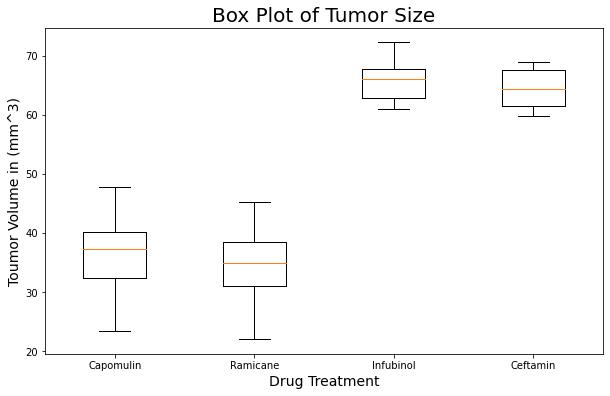

In [212]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create list of observations for each of the four treatments
Capomulin_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Ramicane_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ramicane') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Infubinol_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Infubinol') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Ceftamin_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ceftamin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()

# Build the four lists into a Dictionary
myDic= {'Capomulin':Capomulin_lst, 'Ramicane':Ramicane_lst, 'Infubinol':Infubinol_lst, 'Ceftamin':Ceftamin_lst}

# Build a box plot containing the four treatments.
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Box Plot of Tumor Size', fontsize = 20)
plt.xlabel('Drug Treatment', fontsize = 14 )
plt.ylabel('Toumor Volume in (mm^3)', fontsize = 14)
ax.boxplot(myDic.values())
ax.set_xticklabels(myDic.keys());    


## Line and Scatter Plots

In [213]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


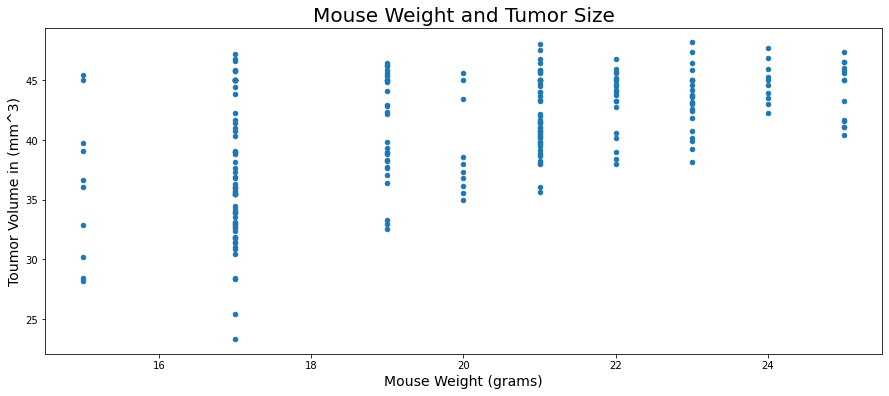

In [214]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') ]
capomulin_scatter = capomulin_scatter[['Tumor Volume (mm3)', 'Weight (g)']]
capomulin_scatter


capomulin_scatter.plot.scatter( x='Weight (g)', y='Tumor Volume (mm3)', figsize=(15, 6))
plt.xlabel('Mouse Weight (grams)', fontsize = 14 )
plt.ylabel('Toumor Volume in (mm^3)', fontsize = 14)
plt.title('Mouse Weight and Tumor Size', fontsize = 20)

plt.show()



## Correlation and Regression

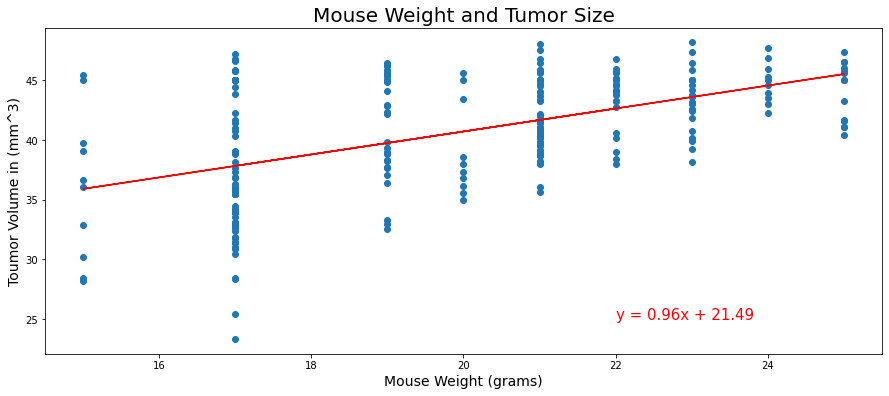

In [215]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
x_value = capomulin_scatter['Weight (g)']
y_value = capomulin_scatter['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


fig = plt.figure(figsize=(15,6)) 
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel('Mouse Weight (grams)', fontsize = 14 )
plt.ylabel('Toumor Volume in (mm^3)', fontsize = 14)
plt.title('Mouse Weight and Tumor Size', fontsize = 20)
plt.annotate(line_eq,(22,25),fontsize=15,color="red")

plt.show()